In [1]:
import sys
sys.path.insert(0, '/home/cameron/Projects/hypso-package')

## Download Multiple NetCDF Files

In [2]:
# Download Files to relative folder  
from hypso import download_nc_files
            
download_nc_files(filename_list=["tibet_2022-09-29_0446Z.nc", "xaafuun_2023-09-11_0623Z-l1a.nc","vancouver_2023-05-25_1831Z-l1a.nc"],
                  download_dir="/home/cameron/Nedlastinger/")

Download Failed. HTTP Error 404: Not Found
Deleting tibet_2022-09-29_0446Z.nc
Download Failed. HTTP Error 404: Not Found
Deleting xaafuun_2023-09-11_0623Z-l1a.nc
Download Failed. HTTP Error 404: Not Found
Deleting vancouver_2023-05-25_1831Z-l1a.nc


## Read NetCDF File

In [2]:
# Import Satellite Object
from hypso import Hypso1
import os

# Define HYPSO Image File and the .points from QGIS (if available)
dir_path = '/home/cameron/Dokumenter/Data/erie'
nc_file = os.path.join(dir_path, 'erie_2022-07-20_1539Z-l1a.nc')
points_file = os.path.join(dir_path, 'erie_2022-07-20_1539Z-bin3.points')

# Create Satellite Object
satobj = Hypso1(path=nc_file, points_path=points_file, verbose=True)

[INFO] Loading L1a capture erie_2022-07-20_1539Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Running georeferencing...
No image mode provided. Detected image mode: bin3
[INFO] Using UTM map: WGS 84 / UTM zone 16N EPSG: 32616


In [3]:
satobj.l1a_cube

<xarray.DataArray (y: 956, x: 684, band: 120)>
array([[[  798,  1371,  2267, ...,  6133,  6129,  6109],
        [  803,  1395,  2266, ...,  6089,  6036,  5969],
        [  789,  1389,  2295, ...,  6039,  5993,  6023],
        ...,
        [  845,  1477,  2530, ..., 10410, 10330, 10207],
        [  849,  1499,  2568, ..., 10492, 10325, 10163],
        [  851,  1485,  2562, ..., 10312, 10183, 10027]],

       [[  797,  1368,  2238, ...,  6203,  6238,  6164],
        [  799,  1361,  2272, ...,  6075,  6099,  6042],
        [  824,  1397,  2307, ...,  5998,  6098,  5985],
        ...,
        [  859,  1511,  2593, ..., 10166,  9997,  9933],
        [  864,  1492,  2548, ..., 10228, 10063, 10001],
        [  874,  1503,  2559, ..., 10241, 10038,  9919]],

       [[  800,  1393,  2286, ...,  6657,  6662,  6501],
        [  809,  1395,  2280, ...,  6537,  6481,  6364],
        [  830,  1372,  2255, ...,  6518,  6455,  6359],
        ...,
...
        ...,
        [  838,  1523,  2527, ..., 11201, 11016, 10895],
        [  816,  1483,  2543, ..., 11099, 10873, 10805],
        [  847,  1523,  2524, ..., 10900, 10782, 10614]],

       [[  781,  1342,  2231, ..., 10345, 10113,  9837],
        [  787,  1353,  2249, ..., 10295, 10171,  9778],
        [  784,  1355,  2245, ..., 10508, 10248,  9933],
        ...,
        [  900,  1591,  2650, ..., 10941, 10844, 10652],
        [  907,  1576,  2639, ..., 10837, 10796, 10594],
        [  887,  1567,  2636, ..., 10762, 10604, 10461]],

       [[  786,  1340,  2204, ..., 10118,  9993,  9658],
        [  785,  1357,  2235, ..., 10099,  9841,  9585],
        [  781,  1342,  2250, ..., 10313, 10069,  9769],
        ...,
        [  946,  1699,  2870, ..., 11082, 10919, 10855],
        [  952,  1740,  2813, ..., 11107, 10950, 10822],
        [  958,  1729,  2846, ..., 10958, 10741, 10741]]], dtype=uint16)
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 947 948 949 950 951 952 953 954 955
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 675 676 677 678 679 680 681 682 683
  * band     (band) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
Attributes:
    level:        L1a
    units:        a.u.
    description:  Raw sensor value

In [5]:
satobj.l1a_cube.sel(x=20, y=20, method='nearest')

<xarray.DataArray (band: 120)>
array([  792,  1344,  2227,  3343,  4718,  6353,  8026,  9598, 10859,
       11771, 12198, 11940, 14176, 15367, 16475, 17700, 18855, 19797,
       19777, 20388, 20941, 20950, 20888, 21353, 22045, 22631, 22626,
       21004, 21600, 22286, 22570, 21930, 21665, 22177, 22450, 21866,
       20710, 21283, 21767, 21897, 22600, 22346, 22170, 21462, 21641,
       21562, 21443, 21062, 20162, 19616, 19132, 18353, 17784, 17443,
       17228, 17304, 16460, 14781, 14719, 14779, 14755, 14820, 14469,
       13950, 13526, 13227, 12901, 12353, 11747, 11503, 11450, 11133,
       10792, 10137,  9374,  9208,  8405,  8631,  8750,  8495,  8229,
        7998,  7714,  7510,  7307,  6378,  6034,  6200,  6682,  6736,
        7346,  8088,  8655,  8904,  6745,  6927,  7516,  7690,  8723,
       11280, 12181, 13288, 14087, 14349, 14310, 14282, 11436,  4784,
        7495, 11757, 12573, 12384, 11990, 11644, 10933,  9788,  9473,
        9308,  9163,  8900], dtype=uint16)
Coordinates:
    y        int64 20
    x        int64 20
  * band     (band) int64 0 1 2 3 4 5 6 7 8 ... 112 113 114 115 116 117 118 119
Attributes:
    level:        L1a
    units:        a.u.
    description:  Raw sensor value

## Get L1A datacube

In [4]:
l1a_cube = satobj.get_l1a_cube()

In [5]:
l1a_cube

<xarray.DataArray (y: 956, x: 684, band: 120)>
array([[[  798,  1371,  2267, ...,  6133,  6129,  6109],
        [  803,  1395,  2266, ...,  6089,  6036,  5969],
        [  789,  1389,  2295, ...,  6039,  5993,  6023],
        ...,
        [  845,  1477,  2530, ..., 10410, 10330, 10207],
        [  849,  1499,  2568, ..., 10492, 10325, 10163],
        [  851,  1485,  2562, ..., 10312, 10183, 10027]],

       [[  797,  1368,  2238, ...,  6203,  6238,  6164],
        [  799,  1361,  2272, ...,  6075,  6099,  6042],
        [  824,  1397,  2307, ...,  5998,  6098,  5985],
        ...,
        [  859,  1511,  2593, ..., 10166,  9997,  9933],
        [  864,  1492,  2548, ..., 10228, 10063, 10001],
        [  874,  1503,  2559, ..., 10241, 10038,  9919]],

       [[  800,  1393,  2286, ...,  6657,  6662,  6501],
        [  809,  1395,  2280, ...,  6537,  6481,  6364],
        [  830,  1372,  2255, ...,  6518,  6455,  6359],
        ...,
...
        ...,
        [  838,  1523,  2527, ..., 11201, 11016, 10895],
        [  816,  1483,  2543, ..., 11099, 10873, 10805],
        [  847,  1523,  2524, ..., 10900, 10782, 10614]],

       [[  781,  1342,  2231, ..., 10345, 10113,  9837],
        [  787,  1353,  2249, ..., 10295, 10171,  9778],
        [  784,  1355,  2245, ..., 10508, 10248,  9933],
        ...,
        [  900,  1591,  2650, ..., 10941, 10844, 10652],
        [  907,  1576,  2639, ..., 10837, 10796, 10594],
        [  887,  1567,  2636, ..., 10762, 10604, 10461]],

       [[  786,  1340,  2204, ..., 10118,  9993,  9658],
        [  785,  1357,  2235, ..., 10099,  9841,  9585],
        [  781,  1342,  2250, ..., 10313, 10069,  9769],
        ...,
        [  946,  1699,  2870, ..., 11082, 10919, 10855],
        [  952,  1740,  2813, ..., 11107, 10950, 10822],
        [  958,  1729,  2846, ..., 10958, 10741, 10741]]], dtype=uint16)
Dimensions without coordinates: y, x, band
Attributes:
    level:        L1a
    units:        a.u.
    description:  Raw sensor value

## Generate L1B datacube

In [6]:
satobj.generate_l1b_cube()

l1b_cube = satobj.get_l1b_cube()

[INFO] Running calibration routines...
[INFO] Running radiometric calibration...
[INFO] Running smile correction...
[INFO] Running destriping correction...


In [7]:
l1b_cube

<xarray.DataArray (y: 956, x: 684, band: 120)>
array([[[  0.        ,   0.        ,   0.        , ...,  80.92908708,
          83.36050147,  85.31312168],
        [  0.        ,   0.        ,   0.        , ...,  82.58820464,
          84.3739673 ,  85.76266997],
        [  0.        ,   0.        ,   0.        , ...,  80.71754832,
          82.45226703,  85.77154641],
        ...,
        [  0.        ,   0.        ,   0.        , ..., 124.13864657,
         125.41705521, 127.49429348],
        [  0.        ,   0.        ,   0.        , ..., 125.23858932,
         124.880285  , 127.34181532],
        [  0.        ,   0.        ,   0.        , ..., 122.28327857,
         123.46631668, 125.40393659]],

       [[  0.        ,   0.        ,   0.        , ...,  81.86477268,
          84.87114042,  86.02675158],
        [  0.        ,   0.        ,   0.        , ...,  82.38707409,
          85.30537161,  86.7623431 ],
        [  0.        ,   0.        ,   0.        , ...,  80.1769776 ,
          83.9588456 ,  85.01326631],
...
        [  0.        ,   0.        ,   0.        , ..., 130.47358318,
         131.53242922, 132.47016163],
        [  0.        ,   0.        ,   0.        , ..., 129.59498001,
         131.22388076, 130.13984233],
        [  0.        ,   0.        ,   0.        , ..., 127.63399969,
         128.51615624, 131.54733659]],

       [[  0.        ,   0.        ,   0.        , ..., 134.08915929,
         136.4922069 , 135.28154078],
        [  0.        ,   0.        ,   0.        , ..., 137.51510499,
         138.17522899, 138.23965472],
        [  0.        ,   0.        ,   0.        , ..., 138.45798246,
         139.14346152, 139.53420511],
        ...,
        [  0.        ,   0.        ,   0.        , ..., 132.09487744,
         132.34786221, 137.78614271],
        [  0.        ,   0.        ,   0.        , ..., 132.48917552,
         132.82446989, 135.31264266],
        [  0.        ,   0.        ,   0.        , ..., 129.55967535,
         130.45974799, 136.78471057]]])
Dimensions without coordinates: y, x, band
Attributes:
    level:        L1b
    units:        $mW\cdot  (m^{-2}  \cdot sr^{-1} nm^{-1})$
    description:  Radiance (L)

## Generate 6sv1 L2A datacube

In [8]:
satobj.generate_l2a_cube(product_name='6sv1')

l2a_cube = satobj.get_l2a_cube()

[INFO] Running 6SV1 atmospheric correction

-------  Py6S Atmospheric Correction  ----------
[ERROR] Unable to generate L2a datacube.


In [9]:
l2a_cube

<xarray.DataArray (y: 956, x: 684, band: 120)>
array([[[-0.33597375, -0.3145017 , -0.30303441, ...,  0.27399502,
          0.2825262 ,  0.29566688],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.27999375,
          0.28618484,  0.29732186],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.27323018,
          0.27924745,  0.29735454],
        ...,
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.43022403,
          0.43435153,  0.45095378],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.434201  ,
          0.43241378,  0.45039244],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.42351574,
          0.42730931,  0.44325828]],

       [[-0.33597375, -0.3145017 , -0.30303441, ...,  0.2773781 ,
          0.28797965,  0.29829406],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.27926654,
          0.28954724,  0.30100208],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.27127569,
          0.28468624,  0.29456299],
...
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.45312871,
          0.4564282 ,  0.46927208],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.44995202,
          0.45531433,  0.46069318],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.44286187,
          0.44553937,  0.46587476]],

       [[-0.33597375, -0.3145017 , -0.30303441, ...,  0.46620123,
          0.47433314,  0.47962196],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.47858812,
          0.48040889,  0.49051204],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.4819972 ,
          0.48390424,  0.49527783],
        ...,
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.45899068,
          0.45937194,  0.48884247],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.46041631,
          0.4610925 ,  0.47973646],
        [-0.33597375, -0.3145017 , -0.30303441, ...,  0.44982437,
          0.45255579,  0.48515577]]])
Dimensions without coordinates: y, x, band
Attributes:
    level:        L2a
    units:        a.u.
    description:  Reflectance (Rrs)
    correction:   6sv1

## Generate ACOLITE L2A datacube
- This works, just don't run it in a notebook

In [ ]:
satobj.generate_l2a_cube(product_name='acolite')

l2a_cube = satobj.get_l2a_cube()

In [ ]:
satobj.generate_l2a_cube(product_name='6sv1')

l2a_cube = satobj.get_l2a_cube()

## Get TOA Reflectance from TOA Radiance (L2A)

In [10]:
satobj.generate_toa_reflectance()

toa_rrs_cube = satobj.get_toa_reflectance()

[INFO] Calibration has already been run. Skipping.
[INFO] Geometry computation has already been run. Skipping.


In [11]:
toa_rrs_cube

<xarray.DataArray (y: 956, x: 684, band: 120)>
array([[[0.        , 0.        , 0.        , ..., 0.2635517 ,
         0.65021212, 0.91288674],
        [0.        , 0.        , 0.        , ..., 0.26895808,
         0.65812533, 0.9177085 ],
        [0.        , 0.        , 0.        , ..., 0.2628693 ,
         0.64314377, 0.91781475],
        ...,
        [0.        , 0.        , 0.        , ..., 0.40257348,
         0.97415556, 1.3585286 ],
        [0.        , 0.        , 0.        , ..., 0.40613672,
         0.96997721, 1.35689116],
        [0.        , 0.        , 0.        , ..., 0.39654922,
         0.95898558, 1.33622957]],

       [[0.        , 0.        , 0.        , ..., 0.26659465,
         0.66198471, 0.92050844],
        [0.        , 0.        , 0.        , ..., 0.26829887,
         0.66537993, 0.92839099],
        [0.        , 0.        , 0.        , ..., 0.26110475,
         0.65488509, 0.90968634],
...
        [0.        , 0.        , 0.        , ..., 0.41788077,
         1.00901168, 1.39408016],
        [0.        , 0.        , 0.        , ..., 0.41506294,
         1.00663545, 1.36954386],
        [0.        , 0.        , 0.        , ..., 0.40877859,
         0.98585502, 1.384343  ]],

       [[0.        , 0.        , 0.        , ..., 0.43124055,
         1.05139845, 1.42956644],
        [0.        , 0.        , 0.        , ..., 0.44226407,
         1.06437582, 1.46084377],
        [0.        , 0.        , 0.        , ..., 0.44530186,
         1.07184719, 1.47454178],
        ...,
        [0.        , 0.        , 0.        , ..., 0.42306865,
         1.0152555 , 1.45000764],
        [0.        , 0.        , 0.        , ..., 0.42432757,
         1.0189022 , 1.42396433],
        [0.        , 0.        , 0.        , ..., 0.41494132,
         1.00075306, 1.43944234]]])
Dimensions without coordinates: y, x, band
Attributes:
    units:        a.u.
    description:  Top of atmosphere (TOA) reflectance

## Write L1b NetCDF

In [12]:
satobj.write_l1b_nc_file()

## Print Contents of .nc file

In [13]:
from hypso.utils import print_nc

# Print Attributes and Groups of .nc file generated
print_nc(nc_file=satobj.l1b_nc_file)

--- GROUP: "/" ---
DIMENSIONS: lines (956), samples (684), bands (120), adcssamples (1631), radrows (684), radcols (120), specrows (120), 
GROUP ATTRIBUTES: instrument, institution, resolution, location_description, license, naming_authority, date_processed, date_aquired, publisher_name, publisher_url, processing_level, target_coords, radiometric_file, spectral_file, md5sum, byte_size_compressed_cube, warnings, smile_file, destriping, 
VARIABLES: 
VAR ATTRIBUTES: 
SUB-GROUPS: logfiles, products, metadata, navigation, 

  --- GROUP: "/logfiles" ---
  DIMENSIONS: 
  GROUP ATTRIBUTES: 
  VARIABLES: 
  VAR ATTRIBUTES: 
  SUB-GROUPS: 

  --- GROUP: "/products" ---
  DIMENSIONS: 
  GROUP ATTRIBUTES: 
  VARIABLES: Lt (lines, samples, bands), 
  VAR ATTRIBUTES: 

      Lt
      ---units: W/m^2/micrometer/sr
      ---long_name: Top of Atmosphere Measured Radiance
      ---wavelength_units: nanometers
      ---fwhm (120,): [5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.

## Compare L1A and L1B NetCDF files

In [14]:
from hypso.utils import compare_netcdf_files

summary_l1a_l1b = compare_netcdf_files(satobj.l1a_nc_file, satobj.l1b_nc_file)
summary_l1a_l1b.head(10)

,label,presence,validator,erie_2022-07-20_1539Z-l1a.nc,erie_2022-07-20_1539Z-l1b.nc
0,"(/, dimensions, adcssamples)",Present in Both,equal,1631,1631
1,"(/, dimensions, bands)",Present in Both,equal,120,120
2,"(/, dimensions, lines)",Present in Both,equal,956,956
3,"(/, dimensions, radcols)",Present in Both,different,1936,120
4,"(/, dimensions, radrows)",Present in Both,different,1216,684
5,"(/, dimensions, samples)",Present in Both,equal,684,684
6,"(/, dimensions, specrows)",Present in Both,different,4,120
7,"(/, group_attributes, byte_size_compressed_cube)",Present in Both,equal,80926339,80926339
8,"(/, group_attributes, date_aquired)",Present in Both,equal,2022-07-20T15:39:14.755850Z,2022-07-20T15:39:14.755850Z
9,"(/, group_attributes, date_processed)",Present in Both,equal,2023-11-28T06:37:28.566739Z,2023-11-28T06:37:28.566739Z


## Get L1a Spectrum

In [15]:
lat = satobj.latitudes[200,500]
lon = satobj.longitudes[200,500]

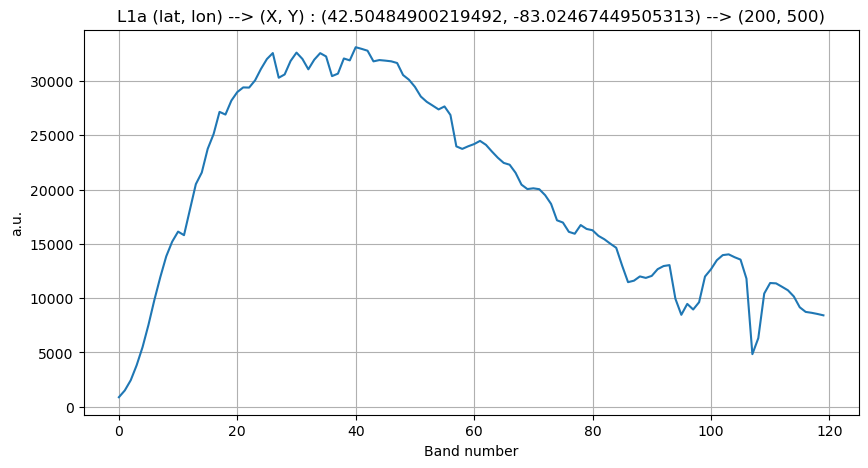

In [16]:
l1a_spectrum = satobj.get_l1a_spectrum(latitude=lat, longitude=lon)

satobj.plot_l1a_spectrum(latitude=lat, longitude=lon)



In [17]:
l1a_spectrum

<xarray.DataArray (band: 120)>
array([  882,  1507,  2444,  3824,  5496,  7551,  9850, 11945, 13854,
       15202, 16130, 15803, 18155, 20500, 21567, 23747, 25114, 27155,
       26908, 28193, 28978, 29407, 29391, 30053, 31111, 32018, 32570,
       30297, 30602, 31840, 32612, 32030, 31074, 31960, 32563, 32258,
       30448, 30676, 32071, 31897, 33108, 32957, 32787, 31806, 31925,
       31873, 31810, 31653, 30547, 30114, 29460, 28567, 28081, 27735,
       27381, 27656, 26868, 23977, 23747, 23987, 24190, 24484, 24120,
       23508, 22935, 22456, 22290, 21549, 20455, 20047, 20118, 20036,
       19485, 18680, 17172, 16965, 16110, 15935, 16734, 16376, 16256,
       15739, 15426, 15020, 14643, 13002, 11477, 11613, 12005, 11868,
       12052, 12673, 12959, 13046,  9946,  8470,  9474,  8959,  9631,
       11996, 12659, 13500, 13967, 14036, 13773, 13553, 11798,  4847,
        6320, 10427, 11397, 11366, 11053, 10729, 10160,  9164,  8738,
        8655,  8547,  8422], dtype=uint16)
Dimensions without coordinates: band
Attributes:
    level:        L1a
    units:        a.u.
    description:  Raw sensor value

## Get L1b Spectrum

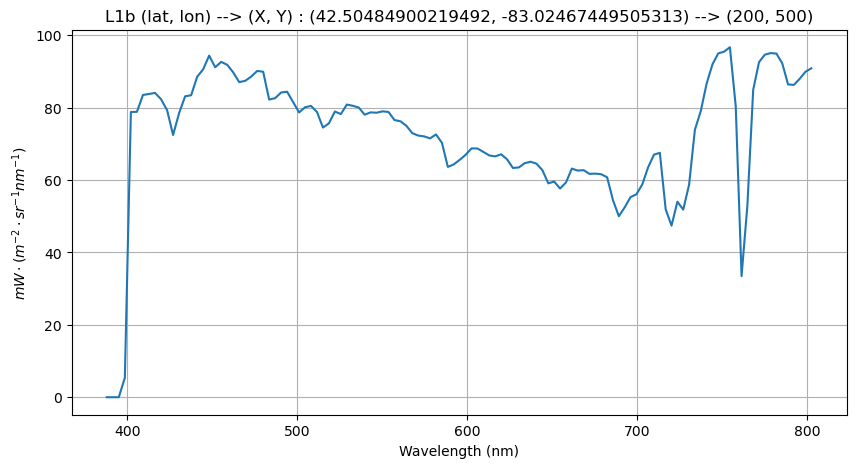

In [18]:
l1b_spectrum = satobj.get_l1b_spectrum(latitude=lat, longitude=lon)

satobj.plot_l1b_spectrum(latitude=lat, longitude=lon)

## Get L2a Spectrum

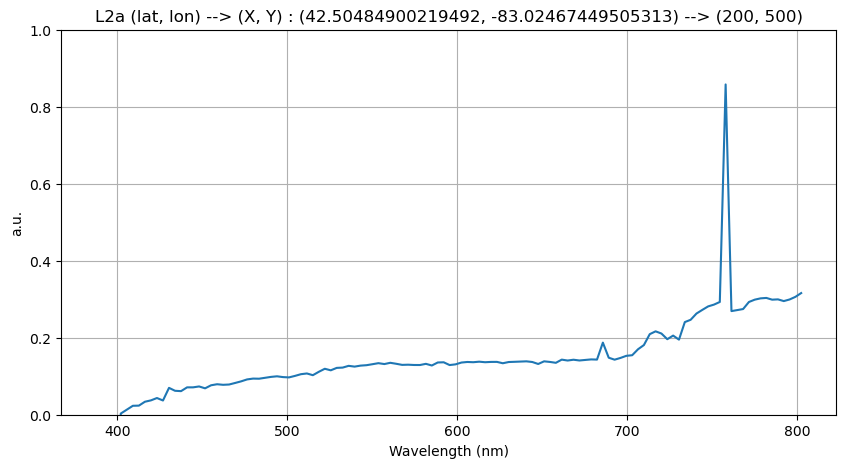

In [19]:
l2a_spectrum = satobj.get_l2a_spectrum(latitude=lat, longitude=lon)

satobj.plot_l2a_spectrum(latitude=lat, longitude=lon)

## Create Land Mask

[INFO] Georeferencing has already been run. Skipping.
[INFO] Running global land mask generation...


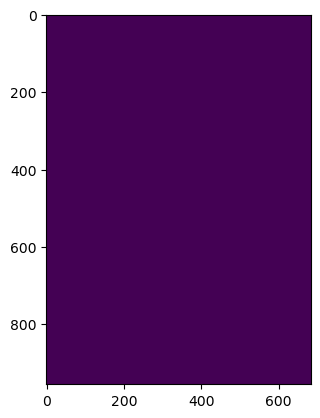

In [20]:
import matplotlib.pyplot as plt
satobj.generate_land_mask(land_mask_name="global")
land_mask = satobj.get_land_mask()
plt.imshow(land_mask)

[INFO] Calibration has already been run. Skipping.
[INFO] Running NDWI land mask generation...
Loading configuration file /home/cameron/Projects/hypso-package/hypso/classification/WaterDetection/WaterDetect.ini
File /home/cameron/Projects/hypso-package/hypso/classification/WaterDetection/WaterDetect.ini verified.
[['ndwi', 'Nir'], ['otsu', 'ndwi']]
maxndwi
Selection of best number of clusters using Calinski-Harabasz Index:
k=2 :Calinski_harabaz index=19017.582642742414
k=3 :Calinski_harabaz index=11168.57737056032
k=4 :Calinski_harabaz index=23582.235379022135
k=5 :Calinski_harabaz index=19130.911861529614
k=6 :Calinski_harabaz index=40823.00748343269
k=7 :Calinski_harabaz index=34829.77776060537
Applying clusters based naive bayes classifier
Assgnin 1 to cluster_id 4
Skipping cluster_id 4


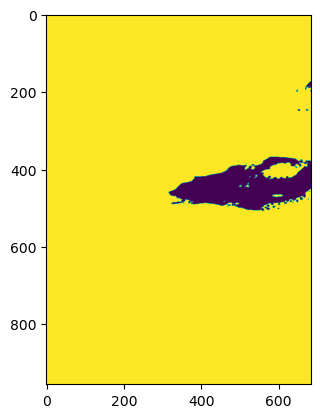

In [21]:
satobj.generate_land_mask(land_mask_name="ndwi")
land_mask = satobj.get_land_mask()
plt.imshow(land_mask)

[INFO] Calibration has already been run. Skipping.
[INFO] Running threshold land mask generation...


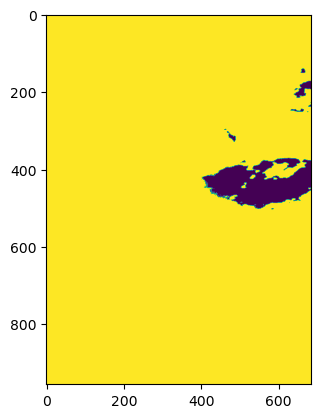

In [22]:
satobj.generate_land_mask(land_mask_name="threshold")
land_mask = satobj.get_land_mask()
plt.imshow(land_mask)

## Create Cloud Mask

In [23]:
# TODO

## Get Unified Mask

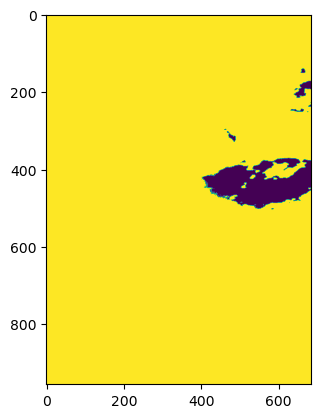

In [24]:
unified_mask = satobj.get_unified_mask()
plt.imshow(unified_mask)

## Get Band Ratio Chlorophyll Estimates (band ratio)

In [25]:
satobj.generate_chlorophyll_estimates(product_name="band_ratio")
chl = satobj.get_chlorophyll_estimates(product_name="band_ratio")

[INFO] Running band ratio chlorophyll estimation...
[INFO] Calibration has already been run. Skipping.


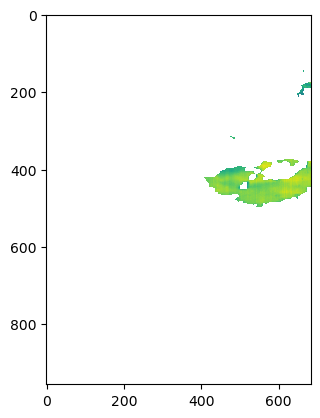

In [26]:
plt.imshow(chl)

In [27]:
chl

<xarray.DataArray (y: 956, x: 684)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x
Attributes:
    description:  Chlorophyll estimates
    method:       549 nm over 663 nm band ratio
    factor:       0.1
    units:        a.u.

## Get Band Ratio Chlorophyll Estimates (6SV1 AQUA Tuned)

In [28]:
model = "/home/cameron/Dokumenter/Chlorophyll_NN_Models/model_6sv1_aqua_tuned.joblib"
satobj.generate_chlorophyll_estimates(product_name="6sv1_aqua", model=model)
chl = satobj.get_chlorophyll_estimates(product_name="6sv1_aqua")

[INFO] Running 6SV1 AQUA Tuned chlorophyll estimation...
[INFO] Calibration has already been run. Skipping.
[INFO] Geometry computation has already been run. Skipping.


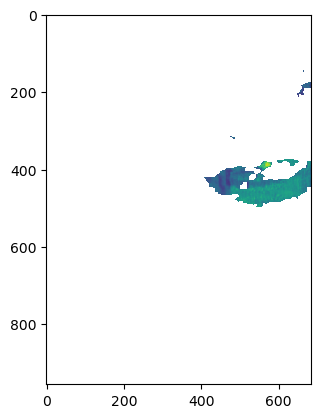

In [29]:
plt.imshow(chl)

## Get Band Ratio Chlorophyll Estimates (ACOLITE AQUA Tuned)

In [49]:
# TODO